#### Simulating the travelling salesman problem with three cities.

* Cost Matrix

In [1]:
K = [0, 2, 3, 4, 0, 6, 7, 8, 0]

* Importing important libraries

In [2]:
from qiskit import *
from qiskit.circuit import ParameterVector, Parameter
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator, StatevectorSimulator
import numpy as np
from qiskit.circuit.library.standard_gates import RXGate, RYGate, RZGate

* Number of Cities 'n'
* Quantum circuit 
* Applying Hadammard to all qubits

In [3]:
n = 3   
qc = QuantumCircuit(n*n)
qc.h([i for i in range(n*n)])     # creating equal superposition

* Parameters

In [4]:
beta_para = (2 * np.pi * np.random.rand(1))               # Beta parameters
theta1 = (2 * np.pi * np.random.rand(1)).tolist()       # Perceptron layers 1st parameters
theta2 = (2 * np.pi * np.random.rand(1)).tolist()       # Perceptron layers 2nd parameters
alpha = (2 * np.pi * np.random.rand(1)).tolist()         # Alpha parameters for pooling layer

* Preparing the multi-controlled X rotational gate

In [5]:
MCRX=RXGate(beta_para[0]).control(4, ctrl_state='0000')

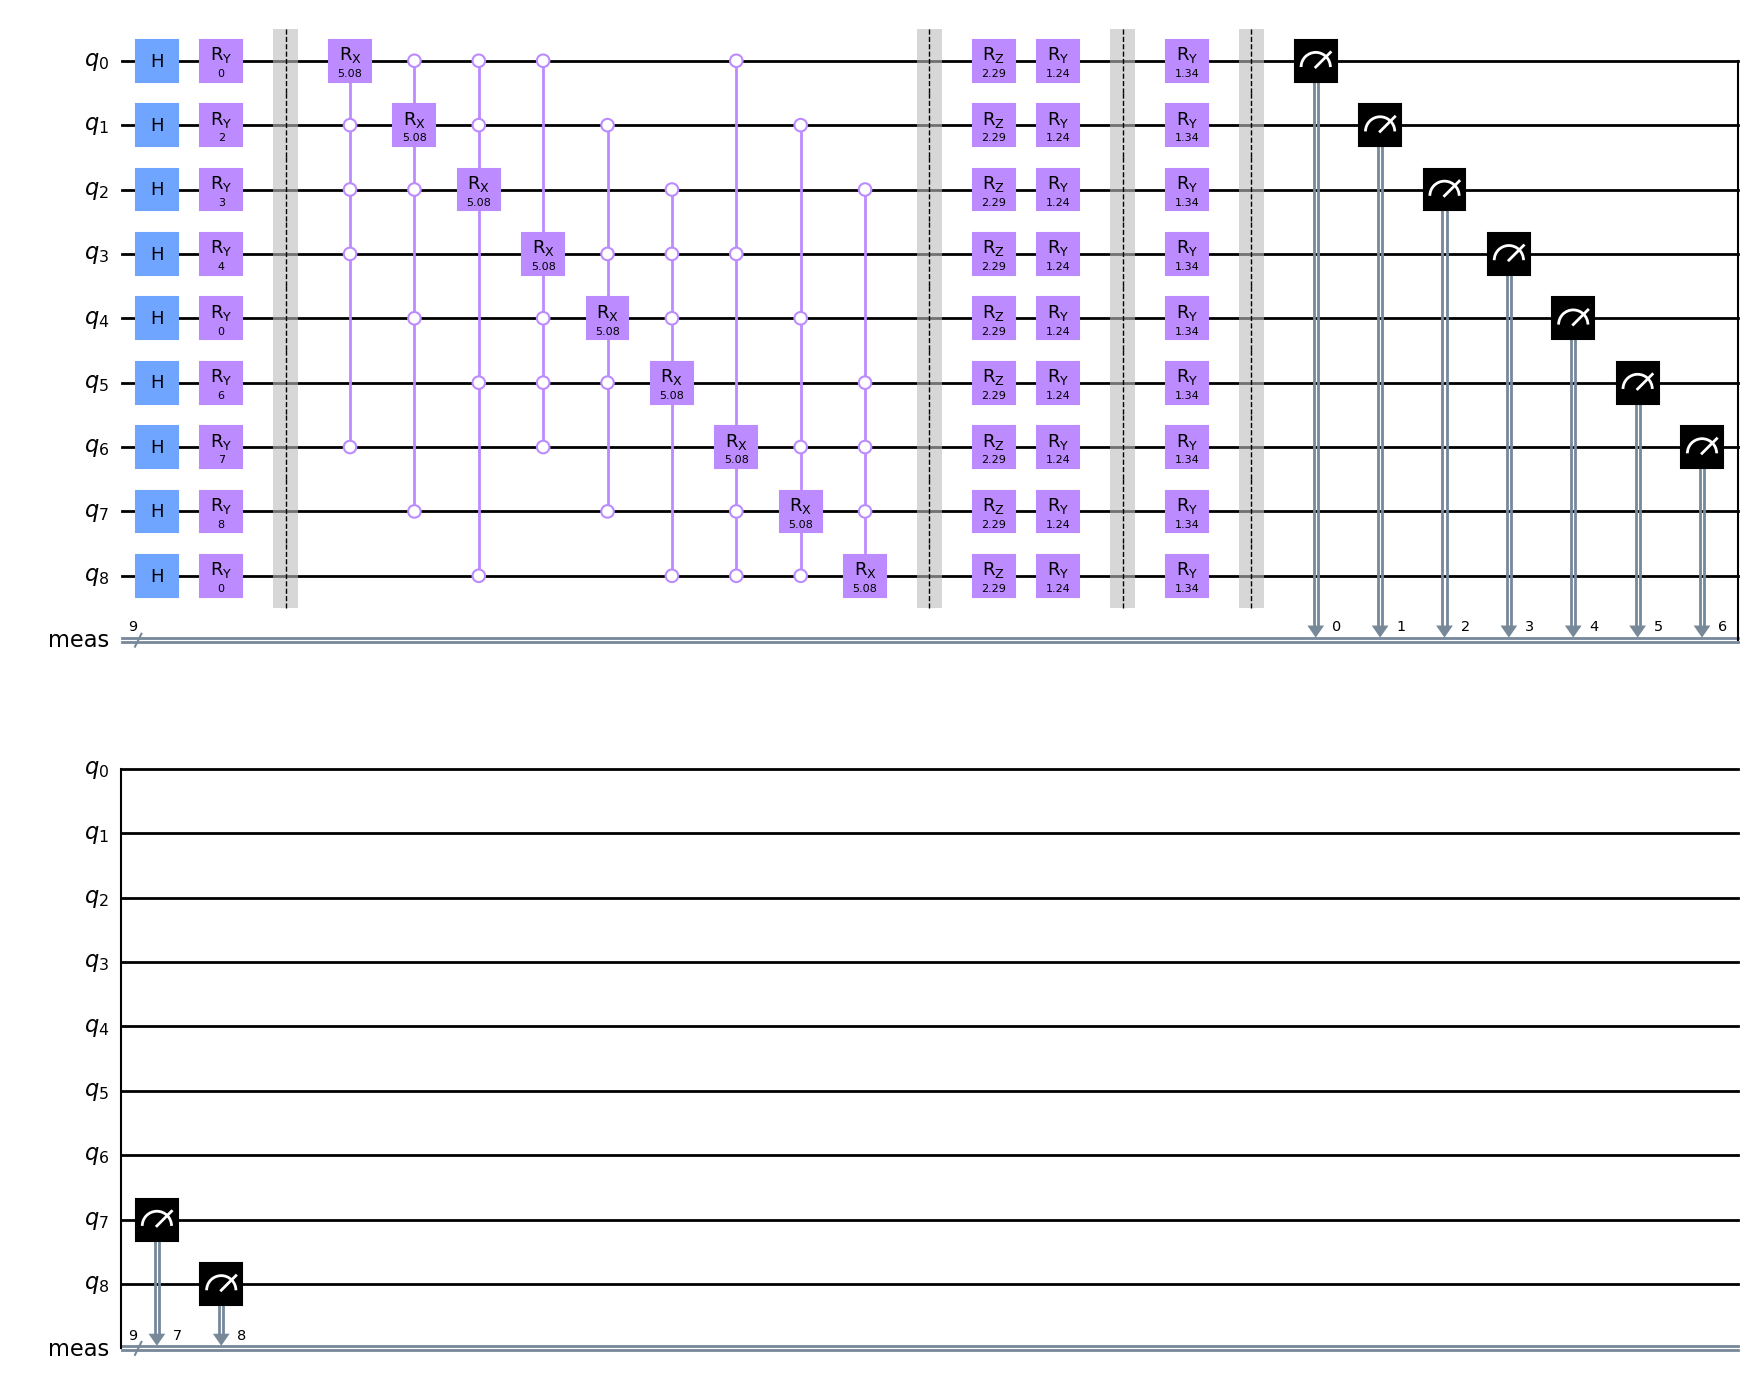

In [6]:
class TSP_Solver:
    def __init__(self, qc,n1, K, theta1, theta2, alpha):
        self.qc = qc 
        self.n1 = n1  # Squared of number of cities
        self.K = K
        self.alpha = alpha[0]
        self.theta1 = theta1[0]
        self.theta2 = theta2[0]
    
    "Creating an object of encoding layer"
    def encoding_layer(self):
        for q in range(len(self.K)):
            self.qc.ry(self.K[q], q)
        self.qc.barrier()
            
            
    "Defining contraint layer"
    def constraint_layer(self): 
        self.qc.append(MCRX, [1, 2, 3, 6, 0])    # rotation on qbit_1
        self.qc.append(MCRX, [0, 2, 4, 7, 1])    # rotation on qbit_2
        self.qc.append(MCRX, [0, 1, 5, 8, 2])    # rotation on qbit_3
        self.qc.append(MCRX, [0, 6, 4, 5, 3])    # rotation on qbit_4
        self.qc.append(MCRX, [1, 7, 3, 5, 4])    # rotation on qbit_5
        self.qc.append(MCRX, [2, 3, 4, 8, 5])    # rotation on qbit_6
        self.qc.append(MCRX, [0, 3, 7, 8, 6])    # rotation on qbit_7
        self.qc.append(MCRX, [1, 4, 6, 8, 7])    # rotation on qbit_8
        self.qc.append(MCRX, [6, 7, 2, 5, 8])    # rotation on qbit_9
        self.qc.barrier()
    
    "Perceptron layer"
    def perceptron_layer(self):
        rz = RZGate(self.theta1)
        ry = RYGate(self.theta2)
        for q in range(n1):
            self.qc.append(rz, [q])
            self.qc.append(ry, [q])
        self.qc.barrier()
            
               
    'Pooling Layer'
    def pooling_layer(self):
        ry = RYGate(self.alpha)
        for q in range(n1):
            self.qc.append(ry, [q])
        
    'Measurement layer'
    def measurement_layer(self):
        self.qc.measure_all()
    
    'Statvector simulating'
    def statevect(self):
        simulator = StatevectorSimulator()
        result= simulator.run(transpile(self.qc, simulator), shots = 1000).result()
        statevector = result.get_statevector()
        return statevector.draw('latex')
    
    
    'Reshaping result to matrix'
    def x_matrix(self):
        simulator = AerSimulator()
        result = simulator.run(transpile(self.qc, simulator), shots = 1).result()
        counts = result.get_counts()
        key = list(counts.keys())[0]
        y1 = np.array([int(key[i]) for i in range(len(key))])
        X1 = y1.reshape(n, n)
        return X1
    
        
n = 3
n1 = n*n
qc = QuantumCircuit(n*n)
qc.h([i for i in range(n*n)])     # creating equal superposition    
TSP = TSP_Solver(qc,n1, K, theta1, theta2, alpha)

TSP.encoding_layer()
TSP.constraint_layer()
TSP.perceptron_layer()
TSP.pooling_layer()
TSP.measurement_layer()
TSP.qc.draw('mpl')

In [8]:
import numpy as np

# Define a vector
vector = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Reshape the vector into a 2x3 matrix
matrix = vector.reshape(3, 3)

print("Original vector:")
print(vector)
print("\nReshaped matrix:")
print(matrix)


Original vector:
[1 2 3 4 5 6 7 8 9]

Reshaped matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [1]:
print('hello word')

hello word


In [2]:
!git add .
!git commit -m "Your commit message"

[main a048915] Your commit message
 2 files changed, 337 insertions(+), 1 deletion(-)
 create mode 100644 .ipynb_checkpoints/TSP-simulation-checkpoint.ipynb


In [6]:
!git push -u origin main


branch 'main' set up to track 'origin/main'.


To https://github.com/Sajjad-Ahmad-phy/Final-Year-Project.git
   974fcf9..a048915  main -> main
